In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.head()
train.tail()
train.info()
combine=[train,test]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.info()
print('-----')
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train[train['Survived']==1].shape[0]/len(train)
train[train['Parch']==0].shape[0]/len(train)
train.groupby('Survived')['Sex'].value_counts()
round(train[train['Sex']=='male'].shape[0]/len(train),2)
train['Cabin'].value_counts()
train['Embarked'].value_counts()
train['Ticket'].value_counts()
train['Ticket'].unique().shape[0]

681

In [6]:
train.groupby('Pclass')['Survived'].mean()
train.groupby('Sex')['Survived'].mean()
train.groupby('SibSp')['Survived'].mean().sort_values(ascending=False)
train.groupby('Parch')['Survived'].mean().sort_values(ascending=False)
train.groupby('Age')['Survived'].mean().sort_values(ascending=False)

Age
0.42     1.0
5.00     1.0
63.00    1.0
53.00    1.0
0.67     1.0
        ... 
28.50    0.0
36.50    0.0
34.50    0.0
20.50    0.0
23.50    0.0
Name: Survived, Length: 88, dtype: float64

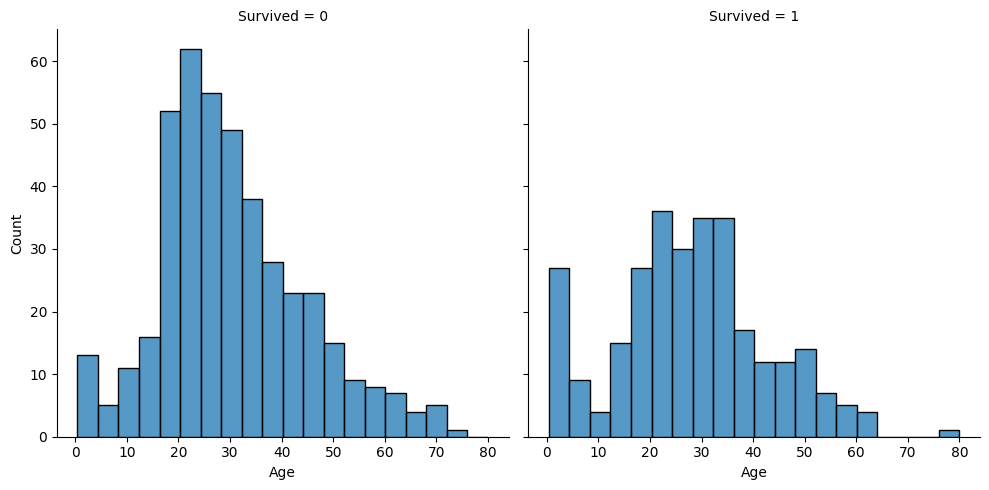

In [83]:
sns.displot(data=train,x='Age', col='Survived')

In [84]:
train[train['Survived']==1].nlargest(1,'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


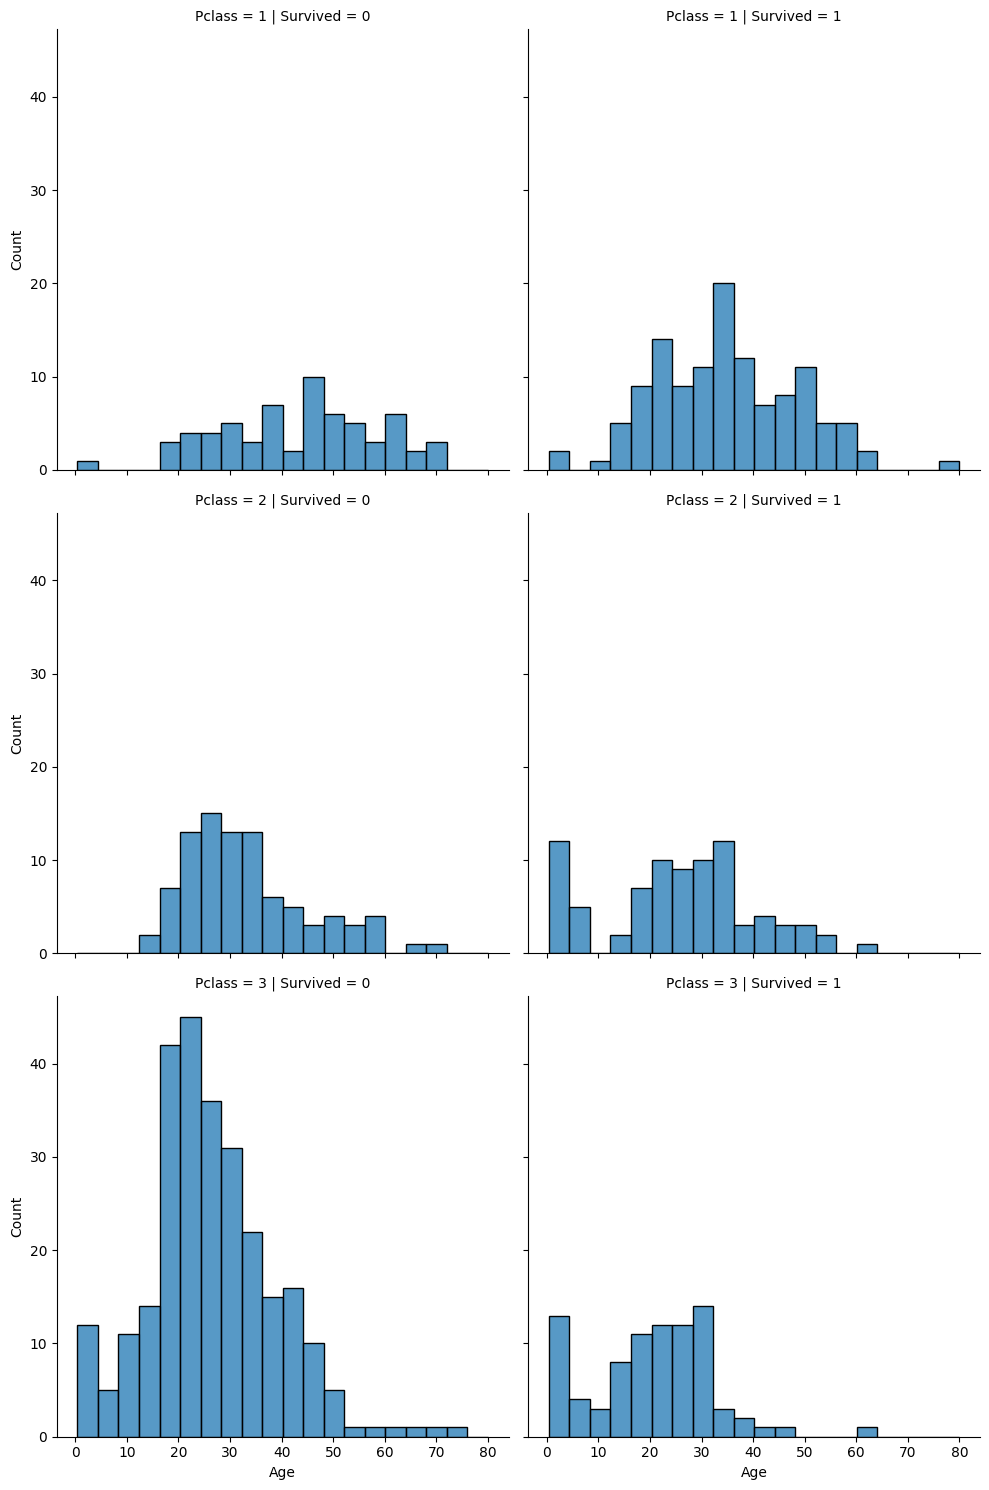

In [85]:
sns.displot(data=train,x='Age', col='Survived', row='Pclass', bins=20)

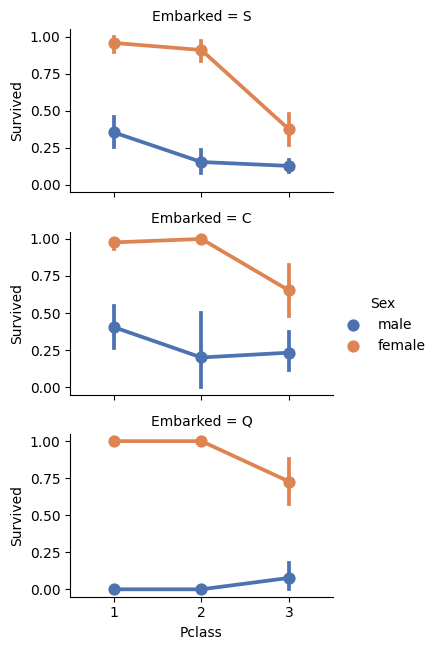

In [86]:
sns.catplot(
    data=train,
    kind="point",
    x="Pclass",
    y="Survived",
    hue="Sex",
    row="Embarked",
    palette="deep",
    height=2.2,
    aspect=1.6
)

In [87]:
train.groupby(['Embarked','Sex','Pclass'])['Survived'].value_counts()

Embarked  Sex     Pclass  Survived
C         female  1       1            42
                          0             1
                  2       1             7
                  3       1            15
                          0             8
          male    1       0            25
                          1            17
                  2       0             8
                          1             2
                  3       0            33
                          1            10
Q         female  1       1             1
                  2       1             2
                  3       1            24
                          0             9
          male    1       0             1
                  2       0             1
                  3       0            36
                          1             3
S         female  1       1            46
                          0             2
                  2       1            61
                          0             6

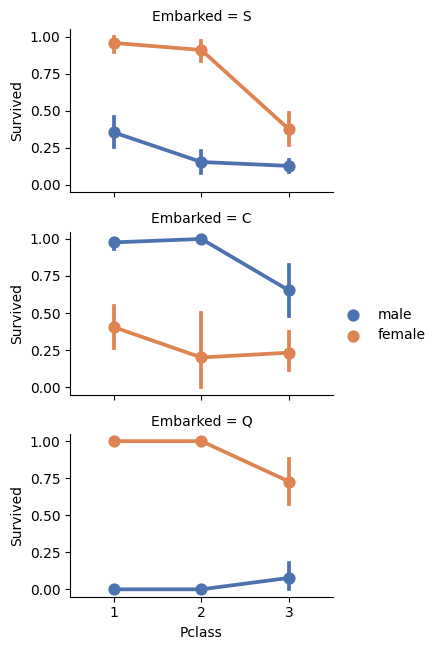

In [88]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

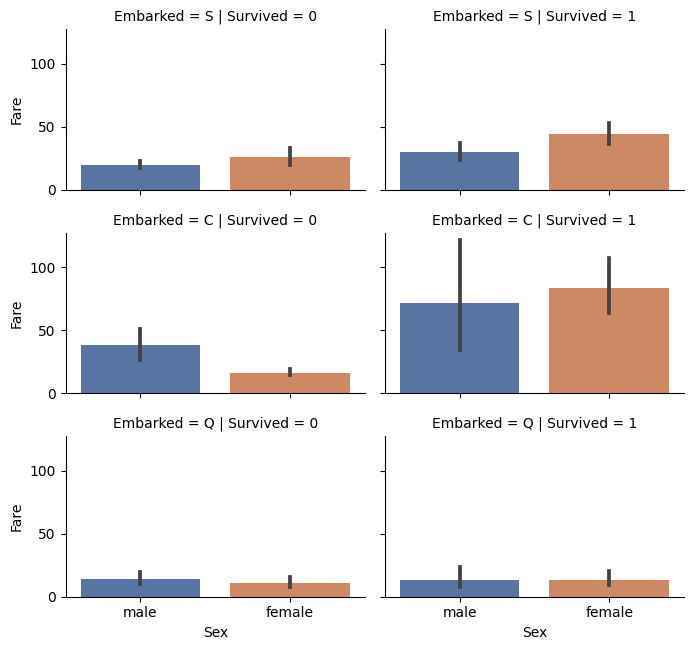

In [89]:
sns.catplot(
    data=train,
    kind="bar",
    x="Sex",
    y="Fare",
    col="Survived",
    row="Embarked",
    palette="deep",
    height=2.2,
    aspect=1.6
)

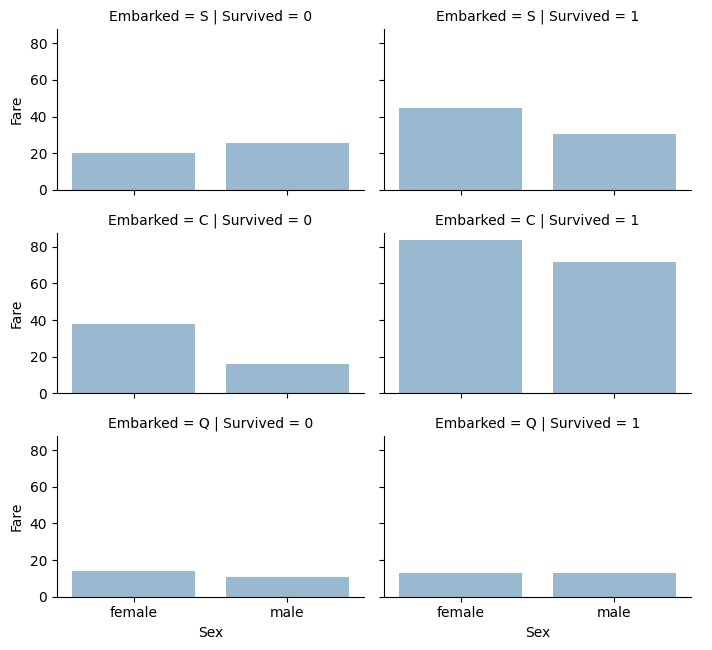

In [90]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

In [91]:
embarked_c = train[train['Embarked'] == 'S']
print(embarked_c['Pclass'].value_counts())
print(embarked_c['Sex'].value_counts())

Pclass
3    353
2    164
1    127
Name: count, dtype: int64
Sex
male      441
female    203
Name: count, dtype: int64


In [92]:
train_drop=train.drop(columns=['Cabin','Ticket'])
test_drop=test.drop(columns=['Cabin','Ticket'])
combine=[train_drop,test_drop]
print(combine)

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...

In [93]:
train_drop['Title']=train_drop.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_drop['Title']=test_drop.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


pd.crosstab(train_drop['Title'], train_drop['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [94]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [95]:
train_drop['Title']=train_drop['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Rare')
train_drop['Title']=train_drop['Title'].replace(['Countess','Mlle','Ms','Lady','Mme'],'Miss')

train_drop.groupby('Title')['Survived'].mean()



for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_drop[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.707447
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.285714


In [96]:
map={'Master':1,'Miss':2,'Mr':3,'Mrs':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(map)

In [97]:
train_drop=train_drop.drop(columns=['PassengerId','Name'])
test_drop=test_drop.drop(columns=['Name'])
train_drop.info()
combine=[train_drop,test_drop]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [98]:
for dataset in combine:
    print(dataset['Sex'].unique())
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

dataset.info()

['male' 'female']
['male' 'female']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


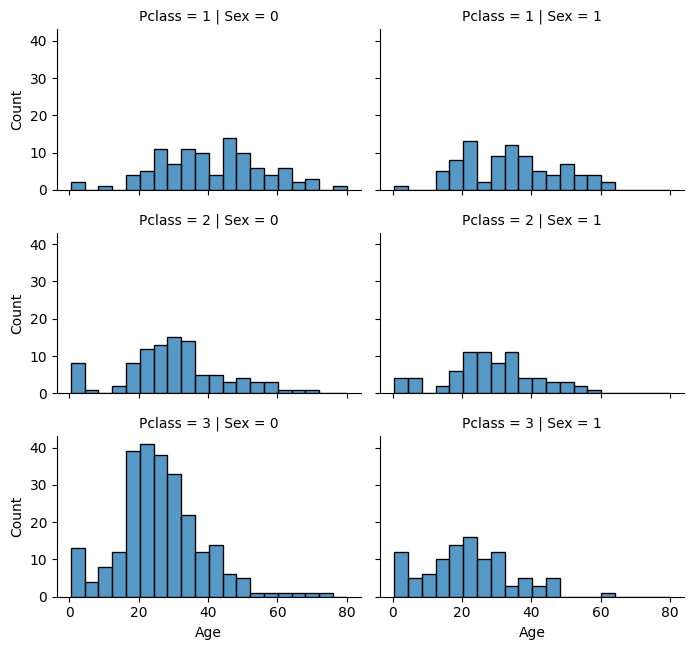

In [99]:
sns.displot(data=train_drop,x='Age',col='Sex',row='Pclass',height=2.2, aspect=1.6)

In [100]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [101]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,3
1,1,1,1,38,1,0,71.2833,C,4
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,4
4,0,3,0,35,0,0,8.0500,S,3


In [102]:
dataset.loc[dataset['PassengerId']==925,:]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
33,925,3,1,22,1,2,23.45,S,4


In [103]:
train_drop['AgeBand'] = pd.cut(train_drop['Age'], 5)
train_drop.groupby('AgeBand')['Survived'].mean()

AgeBand
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [104]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_drop.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,3,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,4,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,4,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,3,"(32.0, 48.0]"


In [105]:
train_drop=train_drop.drop(columns=['AgeBand'])
combine=[train_drop,test_drop]

In [106]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

train_drop.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [107]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

In [108]:
test_drop=test_drop.drop(columns=(['Parch', 'SibSp', 'FamilySize']))
train_drop=train_drop.drop(columns=(['Parch', 'SibSp', 'FamilySize']))

In [109]:
combine=[train_drop, test_drop]

In [110]:
train_drop.info()
train_drop['Embarked'].value_counts()
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
train_drop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null

In [111]:
train_drop.groupby(['Embarked'])['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [112]:
train_drop.groupby(['Embarked','Pclass'])['Survived'].value_counts()

Embarked  Pclass  Survived
C         1       1            59
                  0            26
          2       1             9
                  0             8
          3       0            41
                  1            25
Q         1       0             1
                  1             1
          2       1             2
                  0             1
          3       0            45
                  1            27
S         1       1            76
                  0            53
          2       0            88
                  1            76
          3       0           286
                  1            67
Name: count, dtype: int64

In [113]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'C':0,'Q':1,'S':2})
train_drop.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,2,3,0
1,1,1,1,2,71.2833,0,4,0
2,1,3,1,1,7.9250,2,2,1
3,1,1,1,2,53.1000,2,4,0
4,0,3,0,2,8.0500,2,3,1


In [114]:
train_drop.info()
test_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title     

In [115]:
test_drop['Fare']=test_drop['Fare'].fillna(test_drop['Fare'].dropna().median())

In [116]:
train_drop['FareBand']=pd.qcut(train_drop['Fare'],4)
train_drop.groupby('FareBand')['Survived'].mean()



FareBand
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [117]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.854,'Fare']=0
    dataset.loc[(dataset['Fare']>7.854)&(dataset['Fare']<=10.5),'Fare']=1
    dataset.loc[(dataset['Fare']>10.5)&(dataset['Fare']<=21.679),'Fare']=2
    dataset.loc[(dataset['Fare']>21.679)&(dataset['Fare']<=39.688),'Fare']=3
    dataset.loc[dataset['Fare']>39.688,'Fare']=4
    dataset['Fare']=dataset['Fare'].astype(int)
    
train_drop=train_drop.drop(columns=(['FareBand']))
combine=[train_drop,test_drop]

In [118]:
train_drop['Fare'].unique()

array([0, 4, 1, 2, 3])

In [119]:
train_drop.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,2,3,0
1,1,1,1,2,4,0,4,0
2,1,3,1,1,1,2,2,1
3,1,1,1,2,4,2,4,0
4,0,3,0,2,1,2,3,1


In [120]:
test_drop.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,1,3,1
1,893,3,1,2,0,2,4,0
2,894,2,0,3,1,1,3,1
3,895,3,0,1,1,2,3,1
4,896,3,1,1,2,2,4,0


In [121]:
x_train=train_drop.drop(columns=['Survived'])
y_train=train_drop['Survived']
x_test=test_drop.drop(columns=['PassengerId'])

In [122]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train, y_train)
y_test=lr.predict(x_test)
lr_score=round(lr.score(x_train,y_train)*100,2)
lr_score

78.68

In [123]:
coef=pd.DataFrame(train_drop.columns.delete(0))
coef.columns=['feature']
coef['Correlation']=pd.Series(lr.coef_[0])
coef

,feature,Correlation
0,Pclass,-1.042863
1,Sex,2.476835
2,Age,-0.027040
3,Fare,-0.032356
4,Embarked,-0.281368
5,Title,-0.347995
6,IsAlone,-0.130511


In [124]:
# Support Vector Machines

svc=SVC()
svc.fit(x_train, y_train)
y_test=svc.predict(x_test)
svc_score=round(svc.score(x_train,y_train)*100,2)
svc_score


78.79

In [125]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_test=knn.predict((x_test))
knn_score=round(knn.score(x_train,y_train)*100,2)
knn_score

84.96

In [126]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)
y_test=gnb.predict(x_test)
gnb_score=round(gnb.score(x_train,y_train)*100,2)
gnb_score

75.2

In [127]:
perceptron = Perceptron()
perceptron.fit(x_train,y_train)
y_test=perceptron.predict(x_test)
perceptron_score=round(perceptron.score(x_train,y_train)*100,2)
perceptron_score

76.32

In [128]:
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
y_test=linear_svc.predict(x_test)
linear_svc_score=round(linear_svc.score(x_train,y_train)*100,2)
linear_svc_score

78.9

In [129]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_test = sgd.predict(x_test)
sgd_score = round(sgd.score(x_train, y_train) * 100, 2)
sgd_score

78.9

In [130]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_test = decision_tree.predict(x_test)
decision_tree_score = round(decision_tree.score(x_train, y_train) * 100, 2)
decision_tree_score

86.98

In [131]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_test = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
random_forest_score = round(random_forest.score(x_train, y_train) * 100, 2)
random_forest_score

86.98

In [132]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [svc_score, knn_score, lr_score, 
              random_forest_score, gnb_score, perceptron_score, 
              sgd_score, linear_svc_score, decision_tree_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.98
8,Decision Tree,86.98
1,KNN,84.96
6,Stochastic Gradient Decent,78.90
7,Linear SVC,78.90
0,Support Vector Machines,78.79
2,Logistic Regression,78.68
5,Perceptron,76.32
4,Naive Bayes,75.20


In [133]:
result=pd.DataFrame({'PassengerId': test_drop['PassengerId'],'Survived':y_test})
result.to_csv('submission.csv', index=False)


In [134]:
!rm ssubmission.csv

rm: cannot remove 'ssubmission.csv': No such file or directory
